## **Working with Python DataFrame**

### **Learning outcome:**
- To learn to examine tabular raw data with a pandas dataframe
- To learn to filter data from a dataframe using index- or label-based selection.


####  **Crime Rates Dataset**
##### Load the dataset via a URL

In [ ]:
## Importing libraries
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
## Read in data set and converting it to a pandas dataframe
crime_rates = pd.read_csv('https://raw.githubusercontent.com/' +
                       'csbfx/advpy122-data/master/crime_rates.csv')

In [ ]:
## Let's take a look at the dataframe using head()
crime_rates.head()

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
3,Alaska,1963,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
4,Alaska,1964,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


In [ ]:
## Get a description of the dataframe
crime_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     2200 non-null   object 
 1   Year                      2200 non-null   int64  
 2   Population                2200 non-null   int64  
 3   Violent Crime Rate        2200 non-null   float64
 4   Murder Rate               2200 non-null   float64
 5   Forcible Rape Rate        2200 non-null   float64
 6   Robbery Rate              2200 non-null   float64
 7   Aggraveted Assault Rate   2200 non-null   float64
 8   Property Crime Rate       2200 non-null   float64
 9   Burglary Rate             2200 non-null   float64
 10  Larceny & Theft Rate      2200 non-null   float64
 11  Motor Vehicle Theft Rate  2200 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 206.4+ KB


In [ ]:
## Customize the dataframe using our column names.
## There is another way to do this where you can assign the column name to a list first. See if you can try both ways
crime_rates.columns = ['state', 'year', 'pop', 'violent', 'murder',
                       'rape', 'robbery', 'assault', 'property',
                       'burglary', 'larceny','vehicle']

In [ ]:
## Let's look at our dataframe again
crime_rates.head(3)

,state,year,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60


## Select data from DataFrame
You can select rows with sepcific column value that you specify

In [ ]:
alaska_crimes = crime_rates[crime_rates['state']=='Alaska']
alaska_crimes.head(5)

,state,year,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
3,Alaska,1963,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
4,Alaska,1964,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


### Indexing in pandas
The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, `iloc` and `loc`. For more advanced operations, these are the ones you're supposed to be using.

#### Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data.`iloc` follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [ ]:
crime_rates.iloc[0] # first row


,0
state,Alaska
year,1960
pop,226167
violent,104.30
murder,10.20
rape,20.80
robbery,28.30
assault,45.10
property,"1,544.90"
burglary,332.10


In [ ]:
''' Python index
[start:stop:skip] # stop is exclusive [1:3] --> index 1 & 2.
[1::2, :] # from the 2nd row all the way to the end every other row, and all the columns
[:, :3] # all rows, from the beginning to the 3rd column (0, 1, 2)
'''

crime_rates.iloc[0:10:2, 3:5]

,violent,murder
0,104.30,10.20
2,91.50,4.50
4,150.00,10.40
6,150.40,12.90
8,175.50,10.50


Both `loc` and `iloc` are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with `iloc`, we can do the following:

In [ ]:
crime_rates.iloc[:, 0] # all rows, first column

,state
0,Alaska
1,Alaska
2,Alaska
3,Alaska
4,Alaska
...,...
2195,Wyoming
2196,Wyoming
2197,Wyoming
2198,Wyoming


On its own, the `:` operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the country column from just the first, second, and third row, we would do:

In [ ]:
crime_rates.iloc[:3, 3:]

,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60


#### Label-based selection
The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

In [ ]:
crime_rates.loc[:, ['year', 'state', 'pop']]

,year,state,pop
0,1960,Alaska,226167
1,1961,Alaska,234000
2,1962,Alaska,246000
3,1963,Alaska,248000
4,1964,Alaska,250000
...,...,...,...
2195,1999,Wyoming,480000
2196,2000,Wyoming,493782
2197,2001,Wyoming,494423
2198,2002,Wyoming,498830


## Simple data analysis
Let's take a look at the crime rates in Alaska throughout the years.

In [ ]:
# ### Select crimes data for state of Alaska
alaska_crimes = crime_rates[crime_rates['state']=='Alaska']
### Set the year as the index of the DataFrame
alaska_crimes_by_year = alaska_crimes.set_index('year')
alaska_crimes_by_year.head(5)

,state,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
year,,,,,,,,,,,
1960,Alaska,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1961,Alaska,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
1962,Alaska,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
1963,Alaska,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
1964,Alaska,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


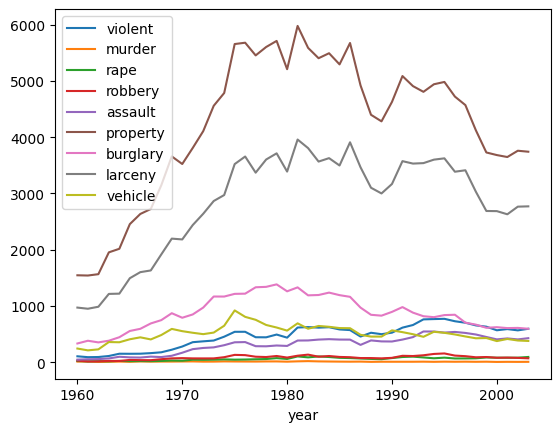

In [ ]:
# ### Use iloc to select all rows and all the columns about crime rates
# ### Use plot.line() to create a line plot
lines = alaska_crimes_by_year.iloc[:,2:].plot.line()

## Your turn.
- Select data from crime_rates dataframe where state equals to "California" and year is between 1980 and 2003, inclusively. *Hint: Use `&` to combine two conditions*.
- Create a line plot where the horizontal axis is year and vertical axis is the number of crime cases.

<Axes: xlabel='Year between 1980 and 2003', ylabel='# of crime cases'>

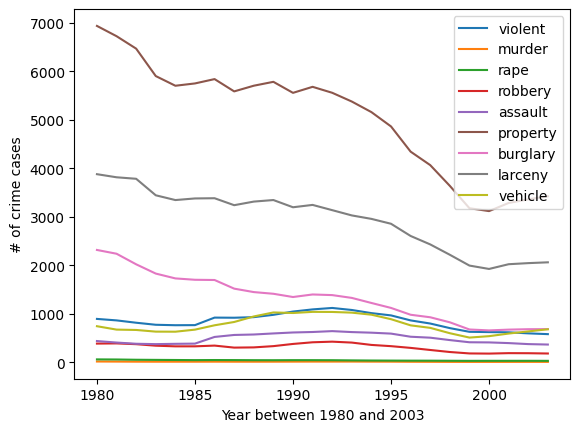

In [ ]:
# Your code here . . .

california_crime_rate = crime_rates[(crime_rates['state'] == 'California') & ((crime_rates['year'] >= 1980) & (crime_rates['year'] <= 2003))]
california_crime_rate


ca_rates_subset = california_crime_rate.drop('pop', axis = 1)

ca_rates_subset.plot.line(x = 'year', xlabel = 'Year between 1980 and 2003', ylabel = '# of crime cases')


## It's still your turn ... to make another plot
* We can't clearly see the trends for the lines that are below 1000  on the y-axis. How about generate another plot, including data for all years, and exclude data for burglary, larceny, and property.

<Axes: xlabel='Years', ylabel='crimerates excluding burglary, larceny, and property'>

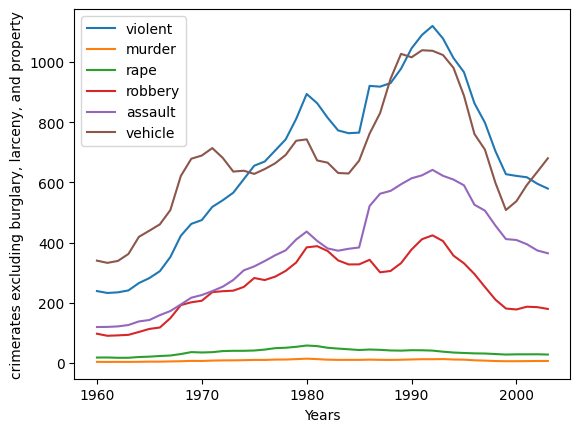

In [ ]:
# Your code here . . .
all_ca_rates = crime_rates[crime_rates['state'] == 'California']
ca_rates_sub2 = all_ca_rates.drop(['pop', 'burglary', 'larceny', 'property'], axis = 1)
ca_rates_sub2.plot.line(x = 'year', xlabel = 'Years', ylabel ='crimerates excluding burglary, larceny, and property')

## One more plot
Create a line plot to show the California population number over the years. Year will be on horizontal axis and population number will be on the y-axis. Remove the legend from the plot.

<Axes: xlabel='year', ylabel='population'>

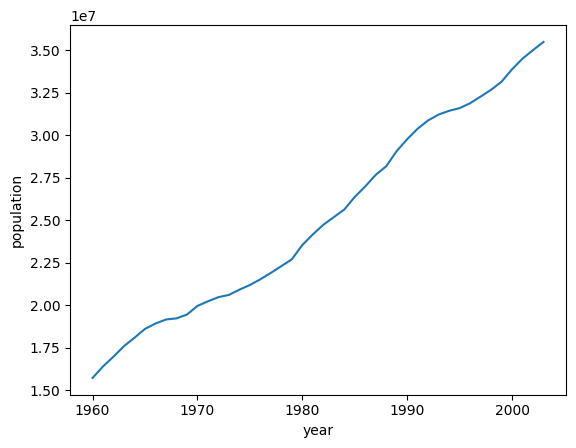

In [ ]:
# Your code here . . .
all_ca_rates.iloc[:, :3].plot.line(x = 'year', y ='pop', ylabel = 'population', legend = False)